<a href="https://colab.research.google.com/github/Ranisoni660/DLP_CIFAR-10-Object-Recognition-using-ResNet50/blob/main/DLP_CIFAR_10_Object_Recognition_using_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
!git clone https://github.com/Ranisoni660/DLP_CIFAR-10-Object-Recognition-using-ResNet50.git

Cloning into 'DLP_CIFAR-10-Object-Recognition-using-ResNet50'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (3/3), done.


In [1]:
!pip install kaggle

In [2]:
#configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
#dataset api
!kaggle competitions download -c cifar-10

 97% 696M/715M [00:05<00:00, 244MB/s]
100% 715M/715M [00:05<00:00, 127MB/s]


In [ ]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [4]:
#extracting the compressed dataset
from zipfile import ZipFile
#copy the path from the cifar-10 zop data
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  #for cofirmation of extraction
  print('the dataset is now extracted')

the dataset is now extracted


In [ ]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [5]:
#installing a different library for extracting 7z file as we can't extract using zip files
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.8/413.8 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 32.7 MB/s eta 0:00:00


In [6]:
import py7zr
#mode r means reading the file
archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
#for extracting in a particular path use------- archive.extractall(path='create a folder and copy its path here')
archive.extractall()
archive.close()

In [ ]:
#for checking the extraction -----there should be train folder
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


**Importing the Dependencies**

In [7]:
#to run through th different files present
import os

#visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#image processing libraries
from PIL import Image
import matplotlib.image as mping

#it splits arrays or matrices into random subsets for train and test data
from sklearn.model_selection import train_test_split

In [8]:
#dir stands for list directory
filenames= os.listdir('/content/train')

In [ ]:
#to check the file type as list
type(filenames)

list

In [ ]:
len(filenames)

50000

In [9]:
#first five elements
print(filenames[0:5])
#last five values
print(filenames[-5:])
#there is a problem which is solved later

['22743.png', '31865.png', '17372.png', '47204.png', '26266.png']
['32357.png', '30990.png', '37512.png', '46151.png', '11370.png']


**Label Processing**

In [10]:
#data labeling is the process of identifying raw data (images, text files, videos, etc.) and adding one or more meaningful and informative labels.
labels_df= pd.read_csv('/content/trainLabels.csv')

collecting few informations

In [ ]:
labels_df.shape

(50000, 2)

In [ ]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
labels_df[labels_df['id']== 7796]

,id,label
7795,7796,frog


In [ ]:
#to check whether the ids are in order or not
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [ ]:
labels_df.tail(10)
#yes the ids are in order

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


*images are not in proper order so we have to change that using for loop and numpy*

In [11]:
#there are three ways to change the particular object code into unique code 1. manually change individual strings into code 2. label encoder 3. warnot encoding(efficient)
#we use first but here first find the objects
labels_df['label'].value_counts()

label
frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: count, dtype: int64

In [12]:
labels_dict={'airplane':0,'automobile':1,'frog':2,'truck':3,'deer':4,'bird':5,'horse':6,'ship':7,'cat':8,'dog':9}
#creating a list with for loop
labels=[labels_dict[i] for i in labels_df['label']]

In [ ]:
print(labels[0:5])
print(labels[-5:])
#now we see a ordered presentation

[2, 3, 3, 4, 1]
[5, 2, 3, 1, 1]


----------------------------------**MAIN TRAINING------------------------**

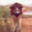

In [13]:
#displaying sample image
import cv2

#imshow will not work in colab as it opens in another window.so they had replaced it with this
from google.colab.patches import cv2_imshow
img=cv2.imread('/content/train/25042.png')
cv2_imshow(img)

In [ ]:
labels_df[labels_df['id']== 7796]

,id,label
7795,7796,frog


In [14]:
id_list=list(labels_df['id'])

In [ ]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


**Image processing**

In [15]:
#convert images to numpy array
#make sure to include forawrd slash
train_data_folder='/content/train/'
data=[]


for id in id_list:
  image=Image.open(train_data_folder+str(id)+'.png')
  image=np.array(image)
  data.append(image)

In [ ]:
type(data)

list

In [16]:
#to check if the images are loaded
len(data)

50000

In [17]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape
#32 and 32 are the height and weight of the image and 3 is the colour channel(RGB)
#in case of grayscale images we will get 32,32 and only 1 colour is present.

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
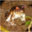

In [ ]:
data[0]#colour ranges from 0 to 255

In [19]:
#convert images list and labels list to numpy arrays
X=np.array(data)
Y=np.array(labels)

In [20]:
type(X)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


**Train test split**

In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2,random_state=2)
#0.2 means that 20% of 50000 data will be the test data
#in case to reatain the same state we use random_state

In [22]:
print(X.shape,X_train.shape,X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


**Scaling the data**

In [23]:
#scaling increase the performance of neural network as the values are now between 0 to 1
X_train_scaled = X_train/255
X_test_scaled=X_test/255

In [ ]:
X_test_scaled

array([[[[0.99215686, 0.87843137, 0.71764706],
         [0.99215686, 0.88235294, 0.7254902 ],
         [0.99607843, 0.89411765, 0.73333333],
         ...,
         [1.        , 0.88627451, 0.72941176],
         [0.99607843, 0.88235294, 0.7254902 ],
         [0.99215686, 0.87843137, 0.72156863]],

        [[0.97647059, 0.8745098 , 0.71764706],
         [0.98039216, 0.87843137, 0.7254902 ],
         [0.98431373, 0.89019608, 0.74117647],
         ...,
         [0.98823529, 0.8745098 , 0.71764706],
         [0.98431373, 0.87058824, 0.71372549],
         [0.98039216, 0.86666667, 0.71372549]],

        [[0.98039216, 0.88235294, 0.72941176],
         [0.98823529, 0.89411765, 0.74509804],
         [0.99607843, 0.90588235, 0.76078431],
         ...,
         [0.99215686, 0.8745098 , 0.71372549],
         [0.98823529, 0.8745098 , 0.71764706],
         [0.98431373, 0.87058824, 0.71372549]],

        ...,

        [[0.98431373, 0.87058824, 0.71372549],
         [0.98823529, 0.8745098 , 0.71764706]

**Building the Neural Network**

In [24]:
#tensorflow is the base library developed by google used for building neural network and used to develop models for various tasks, including natural language processing, image recognition, handwriting recognition
import tensorflow as tf
# Keras is a high-level neural network library that runs on top of TensorFlow. Both provide high-level APIs used for easily building and training models, but Keras is more user-friendly because it's built-in Python while tensorflow in python,c++,CUDA.
from tensorflow import keras


In [25]:
num_of_classes=10

#setting up the layer of neural network
model= keras.Sequential([

     keras.layers.Flatten(input_shape=(32,32,3)),
     keras.layers.Dense(64,activation='relu'),
     keras.layers.Dense(num_of_classes, activation='softmax')
])
#the reason we use 64 is that it is computationally efficient to maximise the usage of RAM.in case of multiple neurons start with 256 then in next layer 124 then 64 and so on.

In [26]:
#compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])


In [27]:
#training the neural network
model.fit(X_test_scaled,Y_train,validation_split=0.1,epochs=10)

Epoch 1/10
282/282 [==============================] - 4s 5ms/step - loss: 2.3242 - acc: 0.0979 - val_loss: 2.3025 - val_acc: 0.0960
Epoch 2/10
282/282 [==============================] - 1s 3ms/step - loss: 2.3027 - acc: 0.1018 - val_loss: 2.3023 - val_acc: 0.0960
Epoch 3/10
282/282 [==============================] - 1s 3ms/step - loss: 2.3026 - acc: 0.1038 - val_loss: 2.3023 - val_acc: 0.0960
Epoch 4/10
282/282 [==============================] - 1s 3ms/step - loss: 2.3026 - acc: 0.1038 - val_loss: 2.3023 - val_acc: 0.0960
Epoch 5/10
282/282 [==============================] - 1s 3ms/step - loss: 2.3026 - acc: 0.1038 - val_loss: 2.3023 - val_acc: 0.0960
Epoch 6/10
282/282 [==============================] - 1s 4ms/step - loss: 2.3026 - acc: 0.1038 - val_loss: 2.3022 - val_acc: 0.0960
Epoch 7/10
282/282 [==============================] - 1s 4ms/step - loss: 2.3026 - acc: 0.1027 - val_loss: 2.3024 - val_acc: 0.0960
Epoch 8/10
282/282 [==============================] - 1s 4ms/step - loss: 2.

**ResNet50**

In [28]:
#training for more accuracy and performance
from tensorflow.keras import Sequential,models,layers
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

in case to learn about the ResNet50 architecture go through the link:https://wisdomml.in/understanding-resnet-50-in-depth-architecture-skip-connections-and-advantages-over-other-networks/

In [30]:
#imagenet data contains around 14 million images.ImageNet dataset is used for training and testing of machine learning models in various CV tasks: image classification, object detection, and object localization.
convolutional_base= ResNet50(weights='imagenet',include_top=False,input_shape=(256,256,3))

94765736/94765736 [==============================] - 1s 0us/step


In [31]:
convolutional_base.summary()
#relu is bsically rectified linear unit, is a non-linear activation function used for deep neural networks

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [32]:
model= models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes,activation='softmax'))

In [33]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='sparse_categorical_crossentropy',metrics=['acc'])

In [34]:
history=model.fit(X_train_scaled, Y_train, validation_split=0.1,epochs=10)

Epoch 1/10
1125/1125 [==============================] - 463s 382ms/step - loss: 2.2186 - acc: 0.1944 - val_loss: 2.0698 - val_acc: 0.2097
Epoch 2/10
1125/1125 [==============================] - 437s 389ms/step - loss: 1.7709 - acc: 0.3191 - val_loss: 1.8932 - val_acc: 0.3540
Epoch 3/10
1125/1125 [==============================] - 438s 389ms/step - loss: 1.5599 - acc: 0.4169 - val_loss: 1.8939 - val_acc: 0.3135
Epoch 4/10
1125/1125 [==============================] - 433s 385ms/step - loss: 1.3858 - acc: 0.4987 - val_loss: 1.2592 - val_acc: 0.5325
Epoch 5/10
1125/1125 [==============================] - 433s 385ms/step - loss: 1.2242 - acc: 0.5704 - val_loss: 1.3047 - val_acc: 0.5345
Epoch 6/10
1125/1125 [==============================] - 433s 385ms/step - loss: 1.1155 - acc: 0.6148 - val_loss: 0.8933 - val_acc: 0.6825
Epoch 7/10
1125/1125 [==============================] - 441s 392ms/step - loss: 1.0136 - acc: 0.6544 - val_loss: 0.9632 - val_acc: 0.6593
Epoch 8/10
1125/1125 [============

In [35]:
loss,accuracy=model.evaluate(X_test_scaled,Y_test)
print('Test Accuracy=',accuracy)

313/313 [==============================] - 39s 116ms/step - loss: 0.8651 - acc: 0.7118
Test Accuracy= 0.7117999792098999


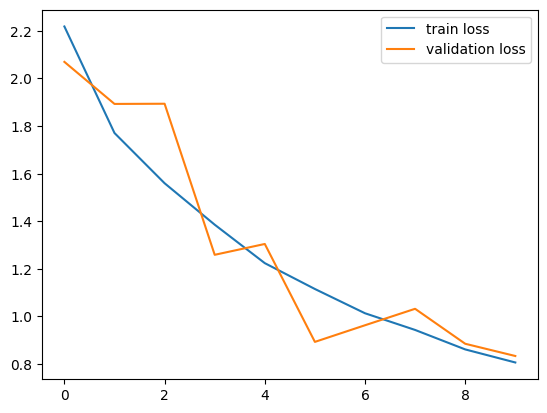

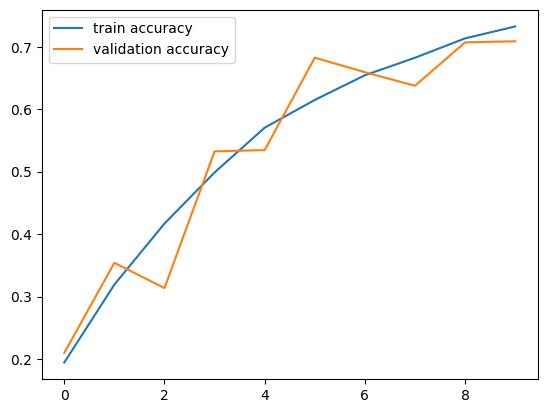

In [36]:
h=history

#plot the loss value
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

#plot the accuracy value
plt.plot(h.history['acc'],label='train accuracy')
plt.plot(h.history['val_acc'],label='validation accuracy')
plt.legend()
plt.show()